# 3-Exploring the Data
In this notebook we start exploring the database downloaded and created by the previous notebooks.

**Requirements:**

- Please run the `2-import-data.ipynb` notebook first so that you create the SQLite database.
- Recommended install: [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/user_install.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sqlapi import VedDb

Start by creating the `db` variable of type `VedDb`. This is our API to the database. All the queries and modifications will happen through this object.

In [2]:
db = VedDb()

The `VedDb` class contains a number of convenience functions to help you explore the database through Pandas DataFrames. The `query_df` function executes an arbitrary SQL query against the database and stores the result on a Pandas DataFrame for further inspection or analysis. The sister function `query` does the same thing but stores the result on a list of tuples instead.

The following command reads all the vehicles into a DataFrame:

In [3]:
vehicles = db.query_df("select * from vehicle")

We can now run a Pandas query on that DataFrame:

In [4]:
vehicles.groupby(by='vehicle_type').count()

,vehicle_id,vehicle_class,engine,transmission,drive_wheels,weight
vehicle_type,,,,,,
EV,3,3,3,0,3,3
HEV,92,1,92,3,0,92
ICE,264,4,264,79,0,248
PHEV,24,24,24,12,24,24


If you want to display the result of a query, you can just display the resulting DataFrame contents, like so:

In [5]:
db.query_df("select * from vehicle").head(10)

,vehicle_id,vehicle_type,vehicle_class,engine,transmission,drive_wheels,weight
0,2,ICE,Car,4-FI 2.0L T/C,NaN,NaN,3500.0
1,5,HEV,Car,4-GAS/ELECTRIC 2.0L,NaN,NaN,3500.0
2,7,ICE,SUV,6-FI 3.6L,AUTOMATIC,NaN,4500.0
3,8,ICE,Car,4-FI 1.5L,5-SP MANUAL,NaN,2500.0
4,9,PHEV,Car,4-GAS/ELECTRIC 1.4L,NaN,FWD,4000.0
5,10,EV,Car,ELECTRIC,NaN,FWD,3500.0
6,11,PHEV,Car,4-GAS/ELECTRIC 2.0L,CVT,FWD,4000.0
7,12,ICE,Car,4-FI 1.8L,NaN,NaN,2500.0
8,108,ICE,NaN,8-4V/FI 6.0L,6-SP AUTOMATIC,NaN,6000.0
9,110,ICE,NaN,6-FI 3.6L,NaN,NaN,4500.0


To make it a bit more convenient, you can also use the `head` and `tail` functions:

In [6]:
db.head("select * from signal where vehicle_id = 10")

,signal_id,day_num,vehicle_id,trip_id,time_stamp,latitude,longitude,speed,maf,rpm,...,ac_power_kw,ac_power_w,heater_power_w,hv_bat_current,hv_bat_soc,hv_bat_volt,st_ftb_1,st_ftb_2,lt_ftb_1,lt_ftb_2
0,18254768,1.719774,10,1558,0,42.277066,-83.763404,53.590000,NaN,NaN,...,NaN,0.0,2250.0,-21.5,96.341469,386.0,NaN,NaN,NaN,NaN
1,18254769,1.719774,10,1558,200,42.277066,-83.763404,51.980000,NaN,NaN,...,NaN,0.0,2250.0,-21.5,96.341469,386.0,NaN,NaN,NaN,NaN
2,18254770,1.719774,10,1558,1200,42.277066,-83.763404,50.369999,NaN,NaN,...,NaN,0.0,2250.0,-21.5,96.341469,386.0,NaN,NaN,NaN,NaN
3,18254771,1.719774,10,1558,1500,42.277066,-83.763404,50.369999,NaN,NaN,...,NaN,0.0,2250.0,23.5,96.341469,390.5,NaN,NaN,NaN,NaN
4,18254772,1.719774,10,1558,2300,42.277066,-83.763404,49.799999,NaN,NaN,...,NaN,0.0,2250.0,23.5,96.341469,390.5,NaN,NaN,NaN,NaN


In [7]:
db.tail("select * from signal where vehicle_id = 10")

,signal_id,day_num,vehicle_id,trip_id,time_stamp,latitude,longitude,speed,maf,rpm,...,ac_power_kw,ac_power_w,heater_power_w,hv_bat_current,hv_bat_soc,hv_bat_volt,st_ftb_1,st_ftb_2,lt_ftb_1,lt_ftb_2
167252,1734639,374.499878,10,3271,418400,42.302562,-83.704803,31.719999,NaN,NaN,...,NaN,400.0,500.0,21.5,96.341469,390.5,NaN,NaN,NaN,NaN
167253,1734640,374.499878,10,3271,419200,42.302562,-83.704803,33.840000,NaN,NaN,...,NaN,400.0,500.0,21.5,96.341469,390.5,NaN,NaN,NaN,NaN
167254,1734641,374.499878,10,3271,419500,42.302562,-83.704803,33.840000,NaN,NaN,...,NaN,400.0,500.0,-73.0,96.341469,390.5,NaN,NaN,NaN,NaN
167255,1734642,374.499878,10,3271,420300,42.302562,-83.704803,40.040001,NaN,NaN,...,NaN,400.0,500.0,-73.0,96.341469,379.5,NaN,NaN,NaN,NaN
167256,1734643,374.499878,10,3271,420500,42.302562,-83.704803,40.040001,NaN,NaN,...,NaN,400.0,500.0,-140.0,96.341469,379.5,NaN,NaN,NaN,NaN


If all you need is a scalar, like when counting records, there's another function for you: `query_scalar`. Here I illustrate its use to highlight the difference between the count of distinct `trip_id` values and distinct pairs of `vehicle_id` and `day_num`, the real way to determine trips.

In [8]:
sql = """
select count(0) from (
    select distinct vehicle_id, day_num
    from signal 
) as distinct_trips
"""
db.query_scalar(sql)

32548

Now we get the number of different instances of `trip_id`.

In [9]:
db.query_scalar("select count(distinct trip_id) from signal")

4153

Finally, let's plot an histogram of trip frequencies, using data previously stored on the `move` table:

In [10]:
sql = """
select    vehicle_id
,         count(day_num) as num_trips
from      move
group by  vehicle_id"""
trip_counts = db.query_df(sql)

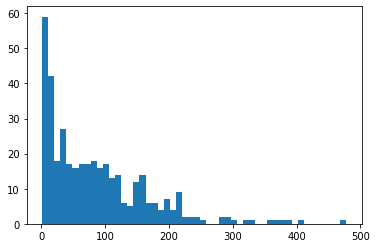

In [11]:
hh = plt.hist(trip_counts['num_trips'].values, bins=50)